### https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
### https://cloud.tencent.com/developer/article/1492314
https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r
### 多分类 ROC
+ https://blog.csdn.net/u011047955/article/details/87259052

### KS Test
+ https://www.cnblogs.com/arkenstone/p/5496761.html

### ROC, KS曲线, Lift 曲线, PR 曲线
+ https://zhuanlan.zhihu.com/p/39435695

### 在什么情况下用什么指标评测

In [1]:
!which python

/Users/sunhongchao/anaconda3/envs/tf_base/bin/python


# MNIST Experiment

In [2]:
# load MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("Mnist_data/", one_hot=True)

# start tensorflow interactiveSession
import tensorflow as tf
sess = tf.InteractiveSession()

# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') # 步长为 2*2, 每次卷积，图像面积都变为原来的四分只一

# Create the model
# placeholder
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])
# variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,W) + b)

# first convolutinal layer
w_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print('h_pool1', h_pool1.get_shape()) # (?, 14, 14, 32)

# second convolutional layer
w_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print('h_pool2', h_pool2.get_shape()) # (?, 7, 7, 64)

# densely connected layer
w_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

# dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# readout layer
w_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# train and evaluate the model
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdagradOptimizer(1e-4).minimize(cross_entropy)

# accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess.run(tf.initialize_all_variables())
for i in range(1200):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1.0})
        print("step %d, train accuracy %g" %(i, train_accuracy))
    train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})

print("test acc %g" % accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0}))

/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sunhongchao/anacon

# Accuracy
+ 二分类 不平衡的情况下是无效的


In [3]:
# micro 

# marco

# Confusion matrix

(?, 10)
[7, 2, 1, 0, 4, 1, 4, 4, 6, 9]
[[6.51579321e-05 2.15295513e-05 1.61809236e-04 1.06585317e-03
  1.99898655e-04 1.18013450e-04 4.45779879e-05 9.94363666e-01
  1.99400656e-05 3.93955829e-03]
 [9.75246802e-02 1.16042551e-02 7.91865408e-01 3.96098942e-02
  9.48573754e-04 1.66262798e-02 1.23201823e-02 1.75704103e-04
  2.85169408e-02 8.08118610e-04]
 [1.03861916e-04 9.93864715e-01 6.98908698e-04 5.78947831e-04
  1.86312653e-04 1.27515593e-03 5.20693138e-04 5.64259244e-04
  9.52454924e-04 1.25466182e-03]
 [8.55720282e-01 2.30955993e-05 1.23378634e-03 1.08287437e-02
  1.25269042e-04 3.32142087e-03 1.23047419e-01 1.25225144e-03
  2.09539337e-03 2.35234550e-03]
 [4.11152234e-03 1.89516300e-04 3.30633274e-03 2.32356600e-04
  9.50986922e-01 9.15580988e-03 6.36065705e-03 3.06553580e-03
  4.18787124e-03 1.84035040e-02]
 [4.20150493e-04 9.93631661e-01 5.36088715e-04 8.62140092e-04
  2.79411441e-04 3.89403314e-04 3.30207899e-04 7.53162953e-04
  1.05958956e-03 1.73823989e-03]
 [3.50755028e-04 1.

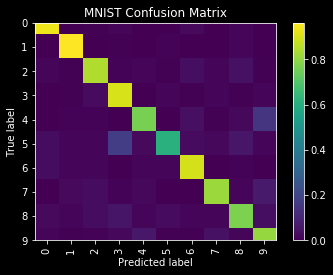

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

def convert_to_one_hot(y, C):
    return np.eye(C)[y.reshape(-1)].T
    
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

print(y_conv.get_shape())

outputs_all = y_conv.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0})


# y = np.array([1,2,3,4])
# convert_to_one_hot(y,5)
outputs = [ np.argmax(item) for item in outputs_all]
grounds = [ np.argmax(item) for item in mnist.test.labels ]

print(outputs[:10])
print(outputs_all[:10])
print(grounds[:10])

# confusion matrix


cm = sklearn.metrics.confusion_matrix(
    grounds,   # array, Gound true (correct) target values
    outputs,  # array, Estimated targets as returned by a classifier
    labels=None,  # array, List of labels to index the matrix.
    sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
)

plot_confusion_matrix(cm, list(range(10)), "MNIST Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()


# p, r, f1

In [5]:

## p
print("precision")
from sklearn.metrics import precision_score
print(precision_score(grounds, outputs, average='macro'))  
print(precision_score(grounds, outputs, average='micro'))  
print(precision_score(grounds, outputs, average='weighted'))
print(precision_score(grounds, outputs, average=None))

## r
print("recall")
from sklearn.metrics import recall_score
print(recall_score(grounds, outputs, average='macro'))  
print(recall_score(grounds, outputs, average='micro'))  
print(recall_score(grounds, outputs, average='weighted'))
print(recall_score(grounds, outputs, average=None))

## pr 曲线

## f1
print("f1")
from sklearn.metrics import f1_score
print(f1_score(grounds, outputs, average='macro'))  
print(f1_score(grounds, outputs, average='micro'))  
print(f1_score(grounds, outputs, average='weighted'))
print(f1_score(grounds, outputs, average=None))

## classification_report
from sklearn.metrics import classification_report
classification_report(grounds, outputs, target_names=[ str(item) for item in list(range(10))])



precision
0.837100873496443
0.8358
0.8380347678259739
[0.88173077 0.9214527  0.85449219 0.76877637 0.82690187 0.85939968
 0.84562439 0.88328076 0.79241307 0.73693694]
recall
0.8318010866588649
0.8358
0.8358
[0.93571429 0.96123348 0.84786822 0.9019802  0.76374745 0.60986547
 0.89770355 0.81712062 0.77207392 0.81070367]
f1
0.8311566062554405
0.8358
0.8338431216237586
[0.90792079 0.94092281 0.85116732 0.83006834 0.79407094 0.71344262
 0.87088608 0.84891359 0.78211128 0.77206229]


'              precision    recall  f1-score   support\n\n           0       0.88      0.94      0.91       980\n           1       0.92      0.96      0.94      1135\n           2       0.85      0.85      0.85      1032\n           3       0.77      0.90      0.83      1010\n           4       0.83      0.76      0.79       982\n           5       0.86      0.61      0.71       892\n           6       0.85      0.90      0.87       958\n           7       0.88      0.82      0.85      1028\n           8       0.79      0.77      0.78       974\n           9       0.74      0.81      0.77      1009\n\n    accuracy                           0.84     10000\n   macro avg       0.84      0.83      0.83     10000\nweighted avg       0.84      0.84      0.83     10000\n'

# other metrics from confusion matrix
+ sensitivity = recall = A/(A + C)
+ specificity = B/(B+D)
+ detection rate = A/(A + B + C + D)
+ Prevalence = (A + C)/(A + B + C + D)
+ Detection Prevalence = (A + B)/(A + B + C + D)
+ Balance Accuracy = [sensitivity + specificity]/2
+ Precision = A/(A+B)
+ Recall = A/(A+C)
+ F1 score = 2 * Precision * Recall /(Precision + Recall)
+ Youden's J Index = sensitivity + specificity - 1


In [6]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn+fp)

# Cohen's Kappa
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html
+ This function computes Cohen’s kappa, a score that expresses the level of agreement between two annotators on a classification problem
+ 一致性检测，多个模型或者分析方法在预测结果上是否具有一致性
+ 只返回一个数，没有具体类别的信息
+ $k = \frac{p_o - p_e}{1 - p_e}$ 
+ $p_e$ 每一类争取分类的样本数，除以总样本数
+ 假设每一类的真实样本个数分别为$a_1,a_2,...,a_C$，而预测出来的每一类的样本个数分别为$b_1,b_2,...,b_C$
+ $ p_o = \frac{a_1 * b_1 + a_2 * b_2 + ... + a_c * b_c}{ n * n} $


![20191023191600.png](https://blog-picture-bed.oss-cn-beijing.aliyuncs.com/blog/upload/20191023191600.png)

In [7]:
print(grounds[:10])
print(outputs[:10])
print(sklearn.metrics.cohen_kappa_score(grounds, outputs, labels=None, weights=None, sample_weight=None))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[7, 2, 1, 0, 4, 1, 4, 4, 6, 9]
0.8174172024263453


# Kolmogorov Smirnov

- http://www.physics.csbsju.edu/stats/KS-test.html
- https://www.cnblogs.com/arkenstone/p/5496761.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
- https://zhuanlan.zhihu.com/p/42656285
    - ks 的各种实现
    - crosstab
    - roc_curve
    - ks_2samp
- 在sklearn库中的roc_curve函数计算roc和auc时，计算过程中已经得到好坏人的累积概率分布，同时我们利用sklearn.metrics.roc_curve来计算ks值

- Kolmogorov-Smirnov是比较一个频率分布f(x)与理论分布g(x)或者两个观测值分布的检验方法

- If the p-value is greater than the significance level (say 5%), then we cannot reject the hypothesis that the data come from the given distribution.


In [8]:
from scipy.stats import kstest
import numpy as np
 
x = np.random.normal(0,1,1000)
test_stat = kstest(x, 'norm')
print(test_stat)

KstestResult(statistic=0.024362870477491305, pvalue=0.5929248717422655)


In [9]:
from scipy.stats import ks_2samp
beta=np.random.beta(7,5,1000)
norm=np.random.normal(0,1,1000)
print(ks_2samp(beta,norm))

Ks_2sampResult(statistic=0.609, pvalue=3.249629335590343e-173)


In [10]:
from scipy.stats import ks_2samp
print(ks_2samp(grounds,outputs))

Ks_2sampResult(statistic=0.0276, pvalue=0.0009828645572326894)


# 多分类 ROC

(10000, 10)
(10000, 10)
i 0 thresholds [1.9997385  0.9997385  0.9636931  0.96357083 0.940925   0.94091225
 0.91527003 0.91490644 0.90997803 0.9088179  0.89238036 0.89224535
 0.87500554 0.8729698  0.8711477  0.87097764 0.8646264  0.86365145
 0.8618899  0.8618058 ]
auc 0.9957231096429703
fpr [0.         0.         0.         0.00011086 0.00011086 0.00022173
 0.00022173 0.00033259 0.00033259 0.00044346 0.00044346 0.00055432
 0.00055432 0.00077605 0.00077605 0.00088692 0.00088692 0.00099778
 0.00099778 0.00110865]
tpr [0.         0.00102041 0.55612245 0.55612245 0.63265306 0.63265306
 0.6744898  0.6744898  0.68061224 0.68061224 0.7122449  0.7122449
 0.73979592 0.73979592 0.74489796 0.74489796 0.75204082 0.75204082
 0.75510204 0.75510204]
i 1 thresholds [1.9980586  0.9980585  0.9936139  0.993608   0.92819583 0.92776644
 0.91723895 0.9171286  0.90507275 0.90487194 0.90210116 0.90200317
 0.8904876  0.88980293 0.8676582  0.8673116  0.8466117  0.84611726
 0.82800204 0.8252098 ]
auc 0.9976866904

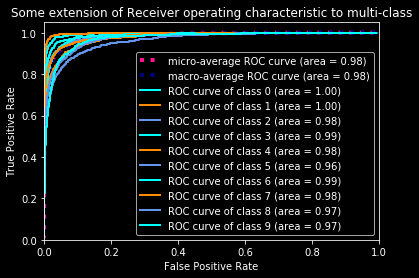

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_class = 10
x_train, x_test, y_train, y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
y_one_hot = label_binarize(y_test, np.arange(n_class))  #装换成类似二进制的编码
y_score = outputs_all

# 计算每一类的ROC
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()

print(y_test.shape)
print(y_score.shape)

# class
for i in range(n_class):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])
    print("i", i, "thresholds", thresholds[i][:20])
    print("auc", roc_auc[i])
    print("fpr", fpr[i][:20])
    print("tpr", tpr[i][:20])

# micio
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# marco
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_class
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
                                             

In [17]:
# 遍历方式处理阈值

def new_fpr_tpr(i, value):
    return_tpr, return_fpr = tpr[i].copy(), fpr[i].copy() 

    #return_fpr = [return_fpr[idx] if thresholds[i][idx] > value else 0 for idx in range(len(return_fpr))]
    return_tpr = [return_tpr[idx] if thresholds[i][idx] < value else 0 for idx in range(len(return_tpr))]

    return return_fpr.copy(), return_tpr.copy()

def calculate_vip(value, vip_calss=[0,1,2,3,4,5]):
    tmp_auc_list = []
    for i in range(n_class):
        tmp_fpr, tmp_tpr = new_fpr_tpr(i, value)
        tmp_auc = auc(tmp_fpr, tmp_tpr)
        # print("tmp_auc", tmp_auc)
        tmp_auc_list.append(tmp_auc)

    # print(tmp_auc_list)

    key_auc_all = 0
    for idx in vip_calss:
        key_auc_all += tmp_auc_list[idx]

    auc_all = 0
    for value in tmp_auc_list :
        auc_all += value
    


    if auc_all == 0:
        return 0
    else:
        # print("key", key_auc_all)
        # print("all", auc_all)
        # print(key_auc_all/auc_all)
        
        return key_auc_all/auc_all

def thresholds_main():
    min_vip = 1
    return_threshold = 0
    for threshold_value in range(10, 100, 5):
        threshold_value = threshold_value/100
        tmp_vip = calculate_vip(threshold_value)
        
        if tmp_vip < min_vip:
            min_vip = tmp_vip 
            return_threshold = threshold_value
            print("threshold", threshold_value, "tmp_vip", tmp_vip, "max_vip", min_vip)
    return return_threshold
print("return thresolds", thresholds_main())


threshold 0.1 tmp_vip 0.6034539060740444 max_vip 0.6034539060740444
threshold 0.15 tmp_vip 0.60276809170967 max_vip 0.60276809170967
threshold 0.2 tmp_vip 0.6025404307117495 max_vip 0.6025404307117495
threshold 0.25 tmp_vip 0.6018165029715987 max_vip 0.6018165029715987
threshold 0.3 tmp_vip 0.6013972580450352 max_vip 0.6013972580450352
threshold 0.35 tmp_vip 0.6012725603405705 max_vip 0.6012725603405705
threshold 0.4 tmp_vip 0.6011208978400892 max_vip 0.6011208978400892
threshold 0.45 tmp_vip 0.6009780218855496 max_vip 0.6009780218855496
threshold 0.5 tmp_vip 0.6008862924020982 max_vip 0.6008862924020982
threshold 0.55 tmp_vip 0.6008424124953752 max_vip 0.6008424124953752
threshold 0.6 tmp_vip 0.6007514401322113 max_vip 0.6007514401322113
threshold 0.7 tmp_vip 0.6006995093132046 max_vip 0.6006995093132046
threshold 0.75 tmp_vip 0.6006897902944367 max_vip 0.6006897902944367
return thresolds 0.75


In [13]:
a = [0.8, 0.8, 0.4, 0.2]
print(np.diff(a))
print(np.where(np.diff(a))[0])

[ 0.  -0.4 -0.2]
[1 2]


In [14]:
list_1 = [0, 1, 0, 1]
print(np.where(list_1))
print(np.where(list_1)[0])
print(np.argsort(list_1))

(array([1, 3]),)
[1 3]
[0 2 1 3]


In [15]:
print(np.r_[list_1, 1])

[0 1 0 1 1]


# Gini Coefficient
- Gini Coefficient = (2 * AUROC) - 1

# Concordance and Discordance

# Somers-D statistic
+ Somers D = (#Concordant Pairs - #Discordant Pairs - #Ties) / Total Pairs

# Gain and Lift Charts
- https://www.cnblogs.com/bicoffee/p/4390614.html

# Log Loss

# Root Mean Squared Error

![](https://www.machinelearningplus.com/wp-content/uploads/2017/09/Confusion-Matrix.png)

![metrics.png](https://blog-picture-bed.oss-cn-beijing.aliyuncs.com/blog/upload/metrics.png)